# Lecture 3 - Introduction to Supervised Learning with (Polynomial) Linear Regression, Code Implementation & Overfitting

---

# Linear Regression with Polynomial Features (or *Polynomial Regression*)

Let's begin by considering the polynomial curve fitting example in the first chapter of the Bishop textbook.

* A regression task is a supervised learning task.
* The target labels are continuous.
* Linear regression is *linear* on the parameters, that is, linear regression is a linear combination of features (which may not be linear themselves).
* If the features are extracted with polynomial basis function, we call the linear regression model a **polynomial regression** model.

<div class="alert alert-info">

**Polynomial Regression** is a type of liner regression that uses a special set of *features* - polynomial features.
</div>

<div class="alert alert-success">
    <b>Step 1 - Input Space</b> 

Suppose we are given a training set comprising of $N$ observations of $\mathbf{x}$, $\mathbf{x} = \left[x_1, x_2, \ldots, x_N \right]^T$, and its corresponding target outputs $\mathbf{t} = \left[t_1, t_2, \ldots, t_N\right]^T$, where sample $x_i$ has the target output label $t_i$.

So, we want to learn the *true* function mapping $f$ such that $\mathbf{t}  = f(\mathbf{x}, \mathbf{w})$, where $\mathbf{w}$ are parameters of the model.
</div>

* Note that both the training data and target outputs can be noisy. Sometimes the target outputs can be mislabeled, so it is important to apply 

* We generally organize data into *matrices* and *vectors*. Not only is it a common way to organize the data, but it allows us to easily apply algebraic operations during analysis. It also makes it much simpler when it comes to code implementation!
    * In most engineering textbooks and in this course, **vectors** are defined as *column vectors*. This is why we write $\mathbf{x} = \left[x_1, x_2, \ldots, x_N \right]^T$.

<div class="alert alert-success">
    <b>Step 2 - Feature Extraction</b> 

Let's consider *polynomial features* for each data point $x_i$, $\phi(x_i)$. We define $\phi(\cdot)$ as the **polynomial basis function** of order $M$: $\phi(x_i) = \left[x_{i}^{0}, x_{i}^{1}, x_{i}^{2}, \dots, x_{i}^M\right]^T$.
</div>

* Other features can be extracted. These can be other basis functions, but can also be extracted by constructing custom coding scripts. Other **basis functions** include:

    * Polynomials Basis functions: $\phi_j(x) = x^j$

    * Radial Basis functions: $\phi_j(x) = \exp\left\{-\frac{(x-\mu_j)^2)}{2s^2}\right\}$

    * Sigmoidal basis function: $\phi_j(x) = \sigma\left(\frac{x-\mu_j}{s}\right)$, where $\sigma(a)$ is the logistic sigmoid function defined by $\sigma(a)=\frac{1}{1+\exp(-a)}$

    * Fourier Basis functions, which leads to an expansion in sinusoidal functions. Each basis function represents a specific frequency and has infinite spatial extent

    * Wavelets Basis Functions, representing both space and frequency

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [ ]:
# Basis Functions
x=np.linspace(-1,1,1000)

fig = plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
polynomials=np.array([x**i for i in range(1,10)]).T # Polynomial Basis Functions
plt.plot(x, polynomials); plt.title('Polynomial Basis Functions')

plt.subplot(1,3,2)
sig=0.3 #fixed standard deviation for each Gaussian basis function
polynomials=np.array([np.exp(-(x-i)**2/(2*sig**2)) for i in np.linspace(-1,1,10)]).T # Gaussian Basis Functions
plt.plot(x, polynomials); plt.title('Gaussian Basis Functions')

plt.subplot(1,3,3)
sig=0.05 #fixed standard deviation for each sigmoidal basis function
polynomials=np.array([1/(1+np.exp(-(x-i)/sig)) for i in np.linspace(-1,1,10)]).T # Sigmoidal Basis Functions
plt.plot(x, polynomials); plt.title('Sigmoidal Basis Functions')

legend_labels=['$\phi_0(x)$','$\phi_1(x)$','$\phi_2(x)$','$\phi_3(x)$','$\phi_4(x)$','$\phi_5(x)$',
           '$\phi_6(x)$','$\phi_7(x)$','$\phi_8(x)$','$\phi_9(x)$','$\phi_{10}(x)$']
fig.legend(legend_labels, loc = (0.1, 0), ncol=11, fontsize=13);

<div class="alert alert-info">
    <b>Feature Space</b> 

The set of features drawn by the transformation 

\begin{align*}
\phi: \mathbb{R} & \rightarrow \mathbb{R}^{M+1} \\
x & \rightarrow [\phi_0(x), \phi_1(x), \phi_2(x), ..., \phi_M(x)]
\end{align*}
is often called the **feature space**.
When we write a linear regression with respect to a set of basis functions, the regression model is linear in the *feature space*.

In this case, the dimensionality of the feature space is $M+1$. This is often referred to as the *model order*.
</div>

* The **feature matrix** $\mathbf{X}$ is a matrix containing all feature mappings for all samples $\{x_i\}_{i=1}^N$ and can be written as:

\begin{align*}
\mathbf{X} =\left[\begin{array}{c} \phi(x_1)^T \\ \phi(x_2)^T \\ \vdots \\ \phi(x_N)^T \end{array}\right]  = \left[\begin{array}{ccccc}
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{M}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{M}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{M}
\end{array}\right] \in \mathbb{R}^{N\times (M+1)}
\end{align*}

where each row is a feature representation of a data point $x_i$.

* Our goal is to find the mapping from the feature input data $\mathbf{X}$ to the desired output values $\mathbf{t}$.

Suppose the data actually comes from some **unknown hidden function**, that takes in the data points $\mathbf{x}$ with some parameters $\mathbf{w}$ and produces the desired values $\mathbf{t}$, i.e. $\mathbf{t} = f(\mathbf{x},\mathbf{w})$.
* We do not know anything about the function $f$. If we knew the hidden function, we would not need to learn the *mapping* - we would already know it. However, since we do not know the true underlying function, we need to do our best to estimate from the examples of input-output pairs that we have.

<div class="alert alert-success">
    <b>Step 3 - Model Selection or Mapping</b> 

Let's assume that the desired output values are a *linear combination* of the feature input space, i.e., the **polynomial function**

\begin{align*}
t \sim y(x,\mathbf{w}) = w_0x^0 + w_1x^1 + w_2x^2+\cdots+w_Mx^M = \sum_{j=0}^{M} w_jx^j = \mathbf{X}\mathbf{w}
\end{align*}
</div>

* This means that for every paired training data point $\{(x_i, t_i)\}_{i=1}^N$, we can model the output value as 

\begin{align*}
t_i \sim y(x_i,\mathbf{w}) = w_0x_i^0 + w_1x_i^1 + w_2x_i^2+\cdots+w_Mx_i^M
\end{align*}

* Although the polynomial function $y(x,\mathbf{w})$ is a nonlinear function of $x$, it is a **linear function of the parameters $\mathbf{w}$**. Functions, such as the polynomial, which are linear in the unknown parameters have important properties and are called *linear models*.

The **linear basis model** for regression takes linear combinations of deterministic nonlinear functions of the input variables

\begin{align*}
t \sim y(x,\mathbf{w}) = w_0 + \sum_{j=1}^{M} w_j\phi_j(x)
\end{align*}

* The parameter $w_0$ allows for any fixed offset in the data and is sometimes called a *bias* parameter. 

* It is often convenient to include an additional dummy *basis function* $\phi_0(x) = 1$ so that

\begin{align*}
t \sim y(x,\mathbf{w}) = \sum_{j=0}^{M} w_j\phi_j(x) = \mathbf{X}\mathbf{w}
\end{align*}
where $\mathbf{w} = \left[w_{0}, w_{1}, \ldots, w_M\right]^T$, $\mathbf{\phi} = \left[\phi_{0}, \phi_{1}, \ldots, \phi_M\right]^T$ and $\mathbf{X} = \left[\begin{array}{ccccc}  1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{M}\\ 1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{M}\\ \vdots & \vdots & \vdots & \ddots & \vdots\\ 1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{M} \end{array}\right]$.
</div>

* The example of the **polynomial regression** is a particular example of this model in which there is a single input variable $x$, and the basis functions take the form of powers of $x$ so that $\phi_j(x)=x^j$. 

The values of the coefficients $\mathbf{w}$ will be determined by *fitting* the polynomial regression model to the training data (or simply **training the model**).

This can be done by minimizing an **objective function** (also defined as **cost function**, **error function**, or **loss function**) that measures the *misfit* between the function $y(x,\mathbf{w})$, for any given value of $\mathbf{w}$, and the training set data points $\{(x_i,t_i)\}_{i=1}^N$.

* What is the model's *objective* or goal?

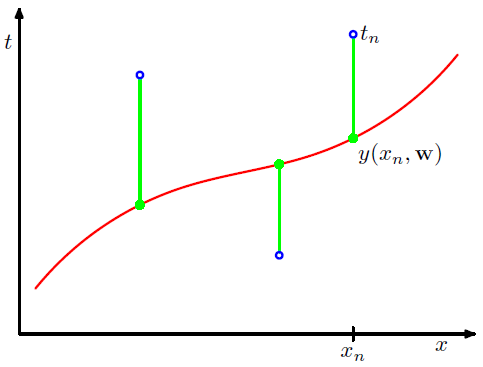

In [1]:
from IPython.display import Image
Image('figures/LeastSquares.png', width=400)

#Source: Christopher M. Bishop. Pattern recognition and machine learning. Springer, 2006.

One simple choice for fitting the model is to consider the error function given by the sum of the squares of the errors between the predictions $y(x_i,\mathbf{w})$ for each data point $x_i$ and the corresponding target values $t_i$, so that we minimize

\begin{align*} J(\mathbf{w}) &= \frac{1}{2} \sum_{n=1}^N \left(t_n - y(x_n,\mathbf{w})\right)^2 \\
&= \frac{1}{2} \sum_{n=1}^N \left(t_n - \sum_{j=0}^{M} w_jx_n^j\right)^2\\
&= \frac{1}{2} \sum_{n=1}^N \left(t_n - \phi(\mathbf{x}_n)^T\mathbf{w}\right)^2\\
&= \frac{1}{2}\left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2\\
&= \frac{1}{2}\left\Vert \mathbf{t} - \mathbf{y} \right\Vert^2_2
\end{align*}

Other objective functions can be considered, for example, the absolute value of the absolute error is often used for sparsity concerns. But we will come back to this topic and discuss it further.

<div class="alert alert-success">
    <b>Step 4 - Objective Function</b> 

This is the measure we want to optimize, that is, minimize (if it is an error function) or maximize if it is a reward function. The objective function can take many forms, for example, the **least squares error** or **mean least squares error**.

\begin{align*}
J(\mathbf{w}) = \frac{1}{2}\left\Vert \mathbf{t} - \mathbf{y} \right\Vert^2_2
\end{align*}

</div>

* Note that $J(\mathbf{w})$ is a scalar value.

* This objective function is minimizing the error of projection (orthogonal distance to the curve).

* We can rewrite the objective function compactly in matrix/vector form:
\begin{align*}
J(\mathbf{w}) &= \frac{1}{2}\left\Vert \mathbf{t} - \mathbf{y} \right\Vert^2_2 \\
&= \frac{1}{2} \left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2\\
&= \frac{1}{2} \left(\mathbf{t}-\mathbf{X}\mathbf{w} \right)^T \left(\mathbf{t}-\mathbf{X}\mathbf{w}\right)\\
\text{where } & \mathbf{X} = \left[\begin{array}{ccccc}
1 & x_{1} & x_{1}^{2} & \cdots & x_{1}^{M}\\
1 & x_{2} & x_{2}^{2} & \cdots & x_{2}^{M}\\
\vdots & \vdots & \vdots & \ddots & \vdots\\
1 & x_{N} & x_{N}^{2} & \cdots & x_{N}^{M}
\end{array}\right], \mathbf{w} =  \left[\begin{array}{c}
w_{0}\\
w_{1}\\
\vdots\\
w_{M}
\end{array}\right], \text{and }  \mathbf{t} = \left[\begin{array}{c}
t_{1}\\
t_{2}\\
\vdots\\
t_{N}
\end{array}\right]
\end{align*}

* Recall that $\left\Vert \mathbf{z} \right\Vert_p$ is called the *p-norm* of the vector $\mathbf{z}$ and is defined as $\left(z_1^p + z_2^p + \cdots + z_N^p\right)^{\frac{1}{p}}$.

<div class="alert alert-success">
    <b>Step 5 - Learning Algorithm</b> 

We *fit* the polynomial function model such that the *objective function* $J(\mathbf{w})$ is optimized.

\begin{align*}
J(\mathbf{w}) = \frac{1}{2}\left\Vert \mathbf{t} - \mathbf{X}\mathbf{w} \right\Vert^2_2
\end{align*}

The optimization problem is posed as:
\begin{align*}
\arg_{\mathbf{w}}\min J(\mathbf{w})
\end{align*}

This reads "find the argument $\mathbf{w}$ that minimizes the objective function $J(\mathbf{w})$".
</div>

* Optimizing the objective function $J(\mathbf{w})$ is finding the *optimal* set of parameter $\mathbf{w}^*$ that minimize the objective function.

* To do that, we **take the derivative of $J(\mathbf{w})$ with respect to the parameters $\mathbf{w}$**.

* How do you take the derivative of a *scalar*, such as $J(\mathbf{w})$, with respect to a vector, such as $\mathbf{w}$?

    * What is the derivative of a scalar with respect to a vector?

* The derivative of the scalar $J(\mathbf{w})$ with respect to the vector $\mathbf{w}=[w_0,w_1,\dots,w_M]^T$ is a **vector**, and it corresponds to take the derivative of $J(\mathbf{w})$ with respect to every element in $\mathbf{w}$:

\begin{align*}
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} = \left[ \frac{\partial J(\mathbf{w})}{\partial w_0},  \frac{\partial J(\mathbf{w})}{\partial w_1}, \ldots,  \frac{\partial J(\mathbf{w})}{\partial w_M} \right]^T
\end{align*}

* If we rewrite the objective function as:
\begin{align*}
J(\mathbf{w}) &= \frac{1}{2} \left(\mathbf{t}- \mathbf{X}\mathbf{w}\right)^T\left(\mathbf{t}- \mathbf{X}\mathbf{w}\right) \\
& = \frac{1}{2} \left(\mathbf{t}^T - \mathbf{w}^T\mathbf{X}^T\right)\left(\mathbf{t} - \mathbf{X}\mathbf{w} \right) \\
& = \frac{1}{2} \left( \mathbf{t}^T\mathbf{t} - \mathbf{t}^T\mathbf{X}\mathbf{w} - \mathbf{w}^T\mathbf{X}^T \mathbf{t} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} \right)
\end{align*}

* Solving for $\mathbf{w}$, we find:

\begin{align*}
\frac{\partial J(\mathbf{w})}{\partial \mathbf{w}} &= 0 \\
\frac{\partial }{\partial \mathbf{w}} \left[\frac{1}{2} \left(\mathbf{t}^T\mathbf{t} - \mathbf{t}^T\mathbf{X}\mathbf{w} - \mathbf{w}^T\mathbf{X}^T \mathbf{t} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} \right) \right] &= 0 \\
\frac{\partial }{\partial \mathbf{w}} \left[ \left(\mathbf{t}^T\mathbf{t} - \mathbf{t}^T\mathbf{X}\mathbf{w} - \mathbf{w}^T\mathbf{X}^T \mathbf{t} + \mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} \right) \right] &= 0 \\
- \mathbf{t}^T\mathbf{X} - (\mathbf{X}^T \mathbf{t})^T + (\mathbf{X}^T\mathbf{X}\mathbf{w})^T + \mathbf{w}^T\mathbf{X}^T\mathbf{X} &=0 \\
\mathbf{w}^T\mathbf{X}^T\mathbf{X} + \mathbf{w}^T\mathbf{X}^T\mathbf{X} - \mathbf{t}^T\mathbf{X} - \mathbf{t}^T\mathbf{X} &= 0\\
2 \mathbf{w}^T\mathbf{X}^T\mathbf{X} &= 2 \mathbf{t}^T\mathbf{X} \\
(\mathbf{w}^T\mathbf{X}^T\mathbf{X})^T &= (\mathbf{t}^T\mathbf{X})^T\text{, apply transpose on both sides} \\
\mathbf{X}^T\mathbf{X}\mathbf{w} &= \mathbf{X}^T\mathbf{t} \\
\mathbf{w} &= \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}
\end{align*}

* This gives us the optimal set of parameters $\mathbf{w}$ that minimize the objective function $J(\mathbf{w})$.

**Test Data**

After the model is trained (i.e. complete optimization of error function using the training labeled data), the **goal** is to *predict* the output values to *new*, unseen and unlabeled test data.

The steps in the test data are:
* Step 1: Extract (the same) features
* Step 2: Run through the trained model using the optimal set of parameters $\mathbf{w}$ to computer the output prediction value

---

# Code Implementation

**What can you control?** 

* Feature vectors or *basis functions*, and
* Model order, $M$.

### Example: Input Data is sampled from a (noisy) sine curve 

Suppose our data comes from a noisy sinusoidal: $t = \sin(2\pi x) + \epsilon$ where $\epsilon$ is a (univariate) Gaussian zero-mean random noise. 

* The univariate Gaussian Distribution is defined as:
\begin{align*}
\mathcal{N}(x | \mu, \sigma^2) = \frac{1}{(2\pi \sigma^2)^{1/2}} \exp\left\{ - \frac{(x - \mu)^2}{2\sigma^2}\right\}
\end{align*}

where $\mu$ is the mean and $\sigma^2$ is the variance. 

* If the noise is zero-mean Gaussian distributed, it is like we are saying there is a Gaussian around the true curve: 

\begin{align*}
t = y + \epsilon
\end{align*}

Let's generate data from the *true* underlying function (which, in practice, we would not know).

In [2]:
def NoisySinusoidalData(N, a, b, sigma):
    '''Generates N data points in the range [a,b) sampled from a sin(2*pi*x) 
    with additive zero-mean Gaussian random noise with standard deviation sigma'''
    
    # N input samples, evenly spaced numbers between [a,b) incrementing by 1/N
    x = np.linspace(a,b,N)
    
    # draw N sampled from a univariate Gaussian distribution with mean 0, sigma standard deviation and N data points
    noise = np.random.normal(0,sigma,N)
    
    # desired values, noisy sinusoidal
    t = np.sin(2*np.pi*x) + noise
    
    return x, t

In [3]:
# Generate input samples and desired values
N_train = 70 # number of data samples for training
N_test = 20 # number of data samples for test

a, b = [0,1] # data samples interval

sigma_train = 0.4 # standard deviation of the zero-mean Gaussian noise -- training data
sigma_test = 0.5 # standard deviation of the zero-mean Gaussian noise -- test data

x_train, t_train = NoisySinusoidalData(N_train, a, b, sigma_train) # Training Data - Noisy sinusoidal
x_true, t_true = NoisySinusoidalData(N_train, a, b, 0) # True Sinusoidal - in practice, we don't have the true fct
x_test, t_test = NoisySinusoidalData(N_test, a, b, sigma_test) # Test Data - Noisy sinusoidal

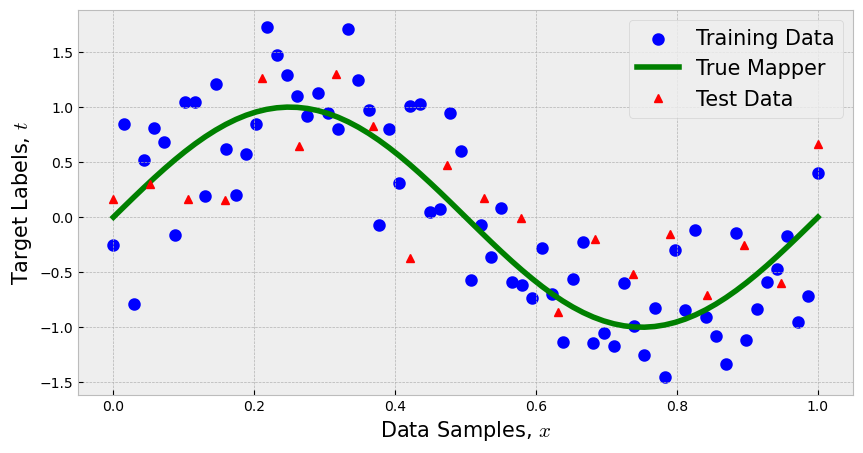

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(x_train, t_train, c='b', linewidths=3, label = 'Training Data')
plt.plot(x_true, t_true, 'g', linewidth=4, label = 'True Mapper')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.legend(fontsize=15)
plt.xlabel('Data Samples, $x$',size=15)
plt.ylabel('Target Labels, $t$',size=15);

Now let's fit the data using the *polynomial regression* model:

In [7]:
x_train[1]

0.014492753623188406

In [8]:
M=3

x_train[1]**0,x_train[1]**1,x_train[1]**2,x_train[1]**3

(1.0, 0.014492753623188406, 0.00021003990758244068, 3.044056631629575e-06)

In [10]:
[x_train[1]**i for i in range(0,M+1)]

[1.0, 0.014492753623188406, 0.00021003990758244068, 3.044056631629575e-06]

In [14]:
# feature matrix
X = np.array([x_train**i for i in range(0,M+1)]).T

In [15]:
X.shape

(70, 4)

In [16]:
X[:2,:]

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.44927536e-02, 2.10039908e-04, 3.04405663e-06]])

In [17]:
def PolynomialRegression(x, t, M):
    '''Fit a polynomial of order M to the data input data x and desire values t'''
    
    # Compute feature matrix X with polynomial features
    X = np.array([x**i for i in range(0,M+1)]).T
    
    # Compute the solution for the parameters w
    w = np.linalg.inv(X.T@X)@X.T@t
    # @ symbols are for matrix multiplications
    
    # Compute model prediction
    y = X@w
    
    return w, y

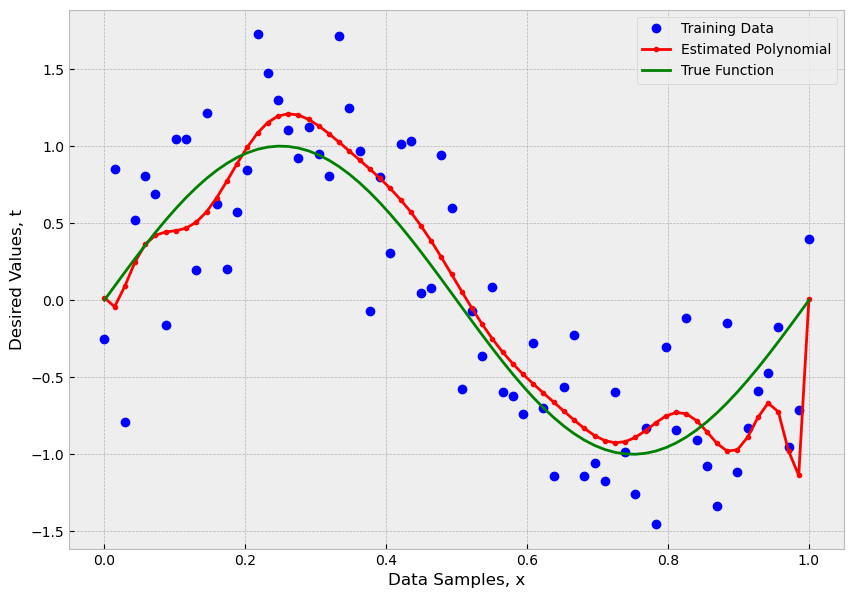

In [28]:
# Model Order
M = 20

# Find the parameters that fit the noisy sinusoidal
w, y_train = PolynomialRegression(x_train,t_train,M) 

plt.figure(figsize=(10,7))
plt.plot(x_train,t_train,'bo', label='Training Data')
plt.plot(x_train,y_train,'.-r', label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'g', label = 'True Function')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

Let's see how well does this trained model **generalize** to the test data, to which we do not have labels.

In the test data:
* Apply the same feature extraction as in training: $\mathbf{X}_{test} = \Phi(\mathbf{x}_{test})$, where $\mathbf{X}_{test}$ is a $K\times (M+1)$ data matrix
* Predict the output using $\mathbf{w}^*$: $\mathbf{y}_{test} = \Phi(\mathbf{x}_{test})\mathbf{w}^*$

In [29]:
def PolynomialRegression_test(x_test, w):
    
    # Compute test feature matrix
    X = np.array([x_test**i for i in range(len(w))]).T
    
    # Prediction for test samples using the trained model
    y = X@w
    
    return y

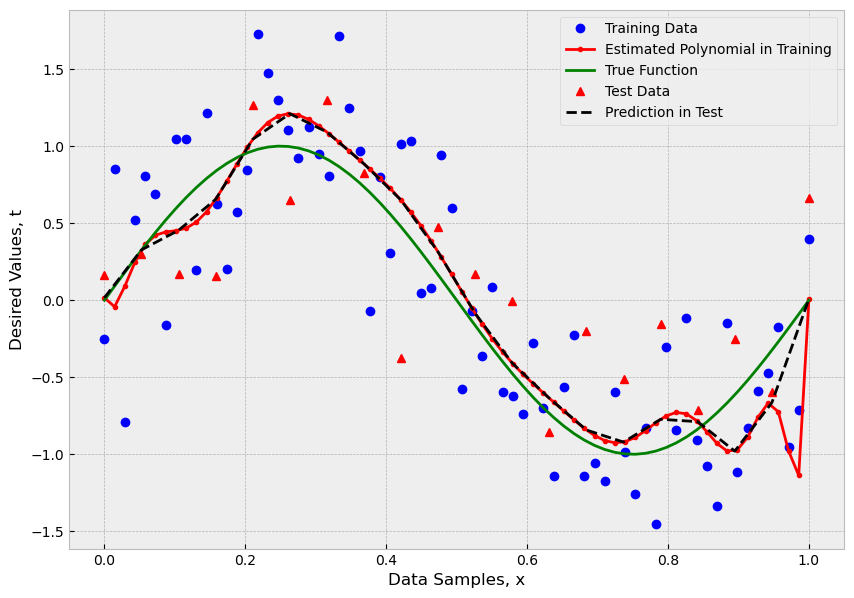

In [30]:
y_test = PolynomialRegression_test(x_test, w)

plt.figure(figsize=(10,7))
plt.plot(x_train, t_train, 'bo', label='Training Data')
plt.plot(x_train, y_train, '.-r', label = 'Estimated Polynomial in Training')
plt.plot(x_true, t_true, 'g', label = 'True Function')
plt.plot(x_test, t_test, 'r^', label = 'Test Data')
plt.plot(x_test, y_test, '--k', label = 'Prediction in Test')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

* How do the weights look like?

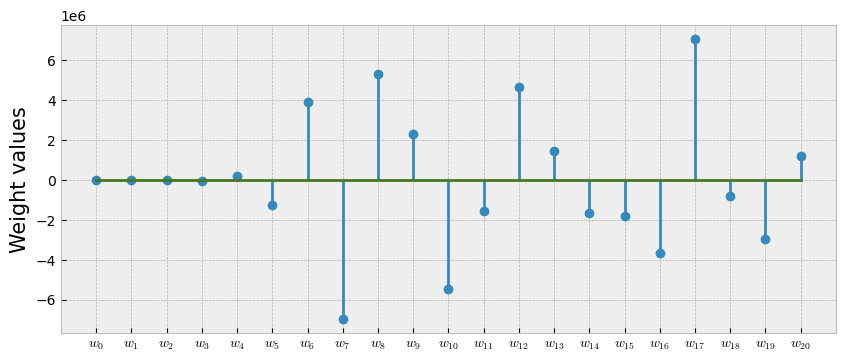

In [31]:
plt.figure(figsize=(10,4))
plt.stem(w)
plt.ylabel('Weight values', size=15)
plt.xticks(np.arange(len(w)), ['$w_{'+str(i)+'}$' for i in 
                               range(len(w))],rotation=0);

In [32]:
w

array([ 1.60379162e-02, -1.71074823e+01,  1.19594820e+03, -2.34789252e+04,
        2.27091887e+05, -1.23053594e+06,  3.90165986e+06, -6.96325064e+06,
        5.31513657e+06,  2.31107373e+06, -5.45138871e+06, -1.55255517e+06,
        4.65305884e+06,  1.45555612e+06, -1.64342967e+06, -1.81915576e+06,
       -3.67035427e+06,  7.06128048e+06, -8.17182395e+05, -2.94028520e+06,
        1.18558035e+06])

* What happens when the test points fall outside the range of what the model has *learned*?

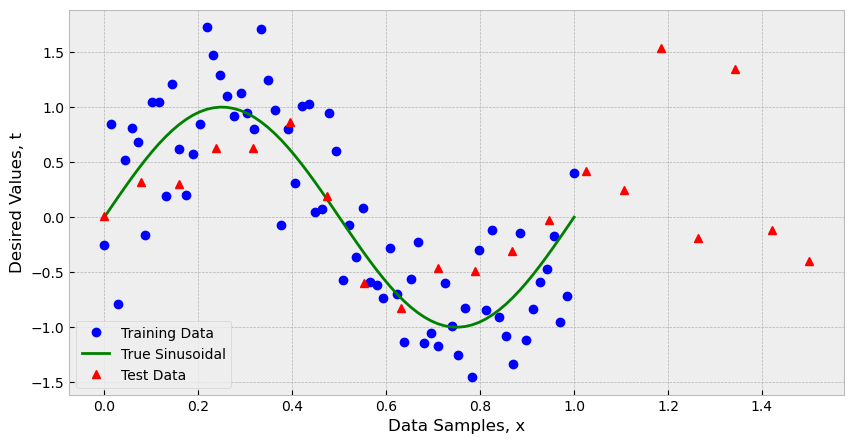

In [36]:
M = 4
w, y_train = PolynomialRegression(x_train,t_train,M) 

x_test2, t_test2 = NoisySinusoidalData(N_test, 0, 1.5, sigma_test)

plt.figure(figsize=(10,5))
plt.plot(x_train, t_train, 'bo', label = 'Training Data')
plt.plot(x_true, t_true, '-g', label = 'True Sinusoidal')
plt.plot(x_test2, t_test2, 'r^', label = 'Test Data')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

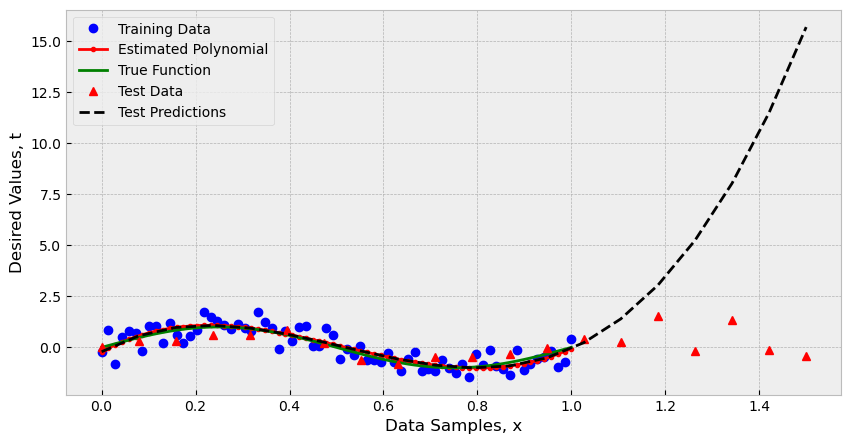

In [37]:
y_test2 = PolynomialRegression_test(x_test2, w)

plt.figure(figsize=(10,5))
plt.plot(x_train,t_train,'bo', label='Training Data')
plt.plot(x_train,y_train,'.-r', label = 'Estimated Polynomial')
plt.plot(x_true,t_true,'-g', label = 'True Function')
plt.plot(x_test2,t_test2,'r^', label = 'Test Data')
plt.plot(x_test2,y_test2,'--k', label = 'Test Predictions')
plt.legend()
plt.xlabel('Data Samples, x')
plt.ylabel('Desired Values, t');

---

# Overfitting and Underfitting

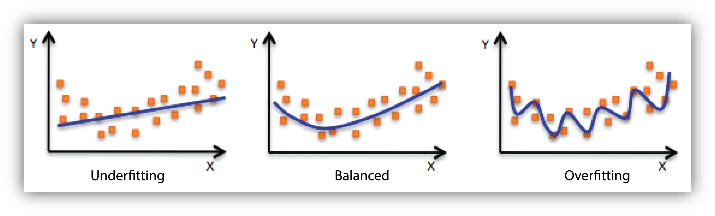

In [2]:
Image('figures/fits.png',width=700)

<div class="alert alert-info">
    <b>Overfitting</b> 

In model fitting, a model is said to have **overfit** to the training data, if it is *not* able to *generalize* to new and unknown data. We can observe this effect as the training error is small but the error in the test data is very large.

In other words, overfitting means that the *true* underlying model of the data is not estimated/learned properly, instead the model returned a poor representation that **memorized** the training samples **and** any meaningless noise in the data.
</div>

<div class="alert alert-info">
    <b>Underfitting</b> 

In model fitting, a model is said to have **underfit** if the error in both in training and test data sets are still decreasing. 

An underfitted model is not complex enough to model all the characteristics in the data.
</div>

As we saw before, as the polynomial model order increases, the weight values become very large! This is a good indication that we may be *memorizing* the training data.

* As $M$ increases, there are more parameters (more elements in the vector $\mathbf{w}$) to learn and, so, the model becomes more complex.

* The model order $M$ in polynomial regression regulates the model *complexity*. The large *M* is, the model complex the model is.
    * In a Polynomial regresssion it also controls the richness of the feature space.
* **Occam's Razor** states that the simplest model that works for our data is usually the most appropriate and sufficient. Model simplicity can mean different things, but we can consider model order. 

As a model that is too *complex*, it is more likely to *overfit*.
* This essentially means it "memorizes" the input training data and becomes incapable of predicting outside it,
* This includes memorizing all of the training data's noise!

---

# Strategies to Mitigate Overfitting

1. Add more data! - when possible

2. Occam's Razor - select a model with lower complexity

3. Regularization - constrains/regularizes the coefficients of the model

4. Cross-validation - technique for utilizing the training data to fine-tune hyperparameter values

---

# Regularization - Adding a Weight Penalty to the Objective Function

Suppose you have $N$ data points and you are trying to estimate $M$ parameters. In other words, you are solving a set of $N$ equations with $M$ variables. For the least squares objective function, we computed the solution for this linear system to be:

$$\mathbf{w} = \mathbf{X}^{\dagger}\mathbf{t} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{t}$$

**What happens when we have more unknowns than known variables, i.e., $M > N$? (This means the feature matrix $X$ will be a wide matrix.)** 

In other words, what happens when the data matrix, $\mathbf{X}^T\mathbf{X}$, is **not** full rank?

* Review *span* and *rank*: ["Inverse matrices, column space and null space", YouTube 3Blue1Brown video](https://www.youtube.com/watch?v=uQhTuRlWMxw&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=7)

In practice, it is quite often to obtain a **singular matrix** error. When this occurs, the matrix $\mathbf{X}^T\mathbf{X}$ is **not invertible**.

<div class="alert alert-info">
    <b>Regularization</b> 

Regularization constrains (or regularizes) the parameter coefficients such that they cannot take a large value. Regularization of the model parameters discourages learning a more complex, as to avoid the risk of overfitting.
</div>

### Ridge Regularizer

The Ridge regularizer, also known as the L2-Norm regularizer or weight decay, adds a term with the squared sum of the weights scaled by the hyperparameter $\lambda$. 

\begin{align*}
R^{(L2)}_{\mathbf{w}} &= \lambda \sum_{i=0}^M w_i^2 \\
&= \lambda \Vert\mathbf{w}\Vert_2^2
\end{align*}

This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the objective function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

* The hyperparameter $\lambda$ controls how much you want to regularize the model. If $\lambda$ is 0 then the learning algorithm will just minimize the error term in the cost function. If $\lambda$ is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

### Lasso Regularizer

The Lasso regularizer, also known as the L1-norm regularizer, it adds a term with the L1-norm of the weight vector $\mathbf{w}$ scaled by the hyperparameter $\lambda$. $\lambda$ here has the same tradeoff responsibility.

\begin{align*}
R^{(L1)}_{\mathbf{w}} &= \lambda \sum_{i=0}^M |w_i| \\
&= \lambda \Vert\mathbf{w}\Vert_1
\end{align*}

* An important characteristic of the Lasso regularizer is that it tends to eliminate the weights of the least important features by setting them to zero. This is known as **sparsity**.

### Elastic Net Regularizer

Elastic Net is a middle ground between Ridge and Lasso. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio with the hyperparameter $\beta$.

\begin{align*}
R^{(L12)}_{\mathbf{w}} &= \beta\lambda \sum_{i=0}^M |w_i| + (1-\beta) \lambda \sum_{i=0}^M w_i^2 \\
&= \beta R^{(L1)}_{\mathbf{w}} + (1-\beta) R^{(L2)}_{\mathbf{w}}
\end{align*}

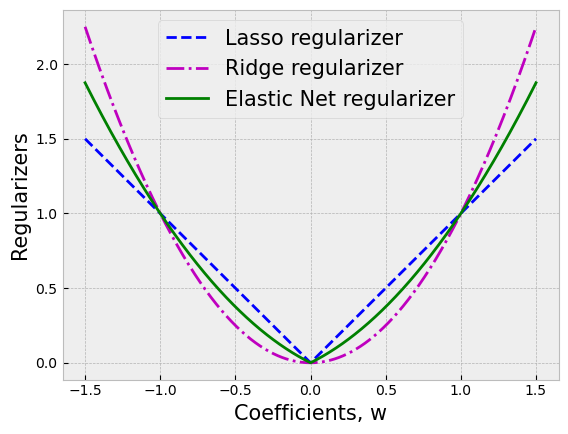

In [38]:
def Regularizers(w,beta=0.5):
    L1 = np.abs(w)
    L2 = w**2
    Elastic = beta*np.abs(w) + (1-beta)*w**2
    return L1, L2, Elastic

x = np.linspace(-1.5,1.5,1000)
L1,L2,Elastic=Regularizers(x)

plt.plot(x,L1, 'b--', label = 'Lasso regularizer')
plt.plot(x,L2, 'm-.', label = 'Ridge regularizer')
plt.plot(x,Elastic, 'g-', label = 'Elastic Net regularizer')
plt.xlabel('Coefficients, w',size=15)
plt.ylabel('Regularizers',size=15); plt.legend(fontsize=15);

### Observations

* Ridge regularizer:
    * forces parameter values to be small but not equal to zero
    * is highly affected by outliers

* Lasso regularizer:
    * promotes sparsity, i.e. forces some parameter values to be exactly equal to zero
    * it is not as affected by outliers
    
* Elastic Net regularizer:
    * requires fine-tuning of an extra hyperparameter

### Examples

* Consider $\mathbf{w}=[0.5,0.5,1]$. We find that the rigde regularizer is $R^{(L2)}_{\mathbf{w}} = 0.5^2+0.5^2+1^2 = 1.5$, whereas the lasso regularizer gives us $R^{(L1)}_{\mathbf{w}}=0.5+0.5+1=2$. Thus, for this set of coefficients, the lasso regularizer will apply a stronger penalty (larger value).

* Consider $\mathbf{w}=[0,0,2]$. We find that the rigde regularizer is $R^{(L2)}_{\mathbf{w}} = 0^2+0^2+2^2 = 4$, whereas the lasso regularizer gives us $R^{(L1)}_{\mathbf{w}}=0+0+2=2$. Thus, for this set of coefficients, the ridge regularizer will apply a stronger penalty (larger value).

### Which one to choose?

Ridge is a good default, but if you suspect that only a few features are actually useful, you should prefer Lasso or Elastic Net since they tend to reduce the useless features' weights down to zero. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

<div class="alert alert-info">
    <b>Ridge Regression</b> 

Let $\{(x_i,t_i)\}_{i=1}^N$ be the set of training data, where $x_i$ are the training samples and $t_i$ their associated target/desired value. Consider the linear regression model: $\mathbf{y} = \mathbf{X}\mathbf{w}$, where $\mathbf{X}$ is the feature matrix of size $N\times(M+1)$.

The Ridge Regression objective function penalizes the weights with the L2-norm:

\begin{align*}
J(\mathbf{w}) &= \Vert\mathbf{t}-\mathbf{X}\mathbf{w}\Vert_2^2 + \lambda \Vert\mathbf{w}\Vert_2^2
\end{align*}

where $\lambda$ is the **hyperparameter** that controls the trade off between minimizing the error and minimizing the regularizer.

Our goal is to find $\mathbf{w}$ that minimizes the objective function $J(\mathbf{w})$, that is:
    
\begin{align*}
\arg_{\mathbf{w}}\min J(\mathbf{w})
\end{align*}

</div>

Let's expand the equation for $J(\mathbf{w})$:

\begin{align*}
J(\mathbf{w}) &= \Vert\mathbf{t}-\mathbf{X}\mathbf{w}\Vert_2^2 + \lambda \Vert\mathbf{w}\Vert_2^2\\
&= (\mathbf{t}-\mathbf{X}\mathbf{w})^T(\mathbf{t}-\mathbf{X}\mathbf{w}) + \lambda\mathbf{w}^T\mathbf{w}\\
&= \mathbf{t}^T\mathbf{t} -\mathbf{t}^T\mathbf{X}\mathbf{w}-\mathbf{w}^T\mathbf{X}^T\mathbf{t}+\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} + \lambda\mathbf{w}^T\mathbf{w}
\end{align*}
    
Taking the derivative:

\begin{align*}
\frac{d J}{d \mathbf{w}} = -2\mathbf{t}^T\mathbf{X} + 2\mathbf{w}^T\mathbf{X}^T\mathbf{X} + \lambda 2\mathbf{w}^T\mathbf{I}
\end{align*}

Setting it to zero, applyting transpose on both sides, and solving for $\mathbf{w}$:

\begin{align*}
-\mathbf{X}^T\mathbf{t} + \mathbf{X}^T\mathbf{X}\mathbf{w} + \lambda \mathbf{I}\mathbf{w} &= 0 \\
(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})\mathbf{w} &= \mathbf{X}^T\mathbf{t}\\
\mathbf{w} &= (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{I})^{-1} \mathbf{X}^T\mathbf{t}
\end{align*}

The optimal solution is in closed-form analytical solution. This is because we are dealing with a linear model and a convex objective function:

$$\mathbf{w} = \left(\mathbf{X}^T\mathbf{X} + \lambda\mathbf{I}\right)^{-1}\mathbf{X}^T\mathbf{t} $$

where $\mathbf{I}$ is an identity matrix of size $(M+1)\times (M+1)$. As you can see, we first **diagonally-load** the square matrix $\mathbf{X}^T\mathbf{X}$ before inverting it.

### Observations

* In practice, the square matrix $\mathbf{X}^T\mathbf{X}$ may be **singular**. This will happen when:
    1. There are more parameters ($M$) than samples ($N$).
    2. Some of the features are linearly dependent.
    
* A singular matrix:
    * is not full rank
    * has at least one eigenvalue equal to 0
    * its determinant is 0
    * one or more columns (or rows) are linearly dependent

* One solution to matrix singularity is to diagonally load it, before inverting. Diagonally loading a singular matrix, will force it to become full rank.

* If $\lambda \rightarrow 0$, then the penalty will be disregarded in the solution for the parameters. This applies the least *distortion* to $\mathbf{X}^T\mathbf{X}$.

* If $\lambda \rightarrow \infty$, then the penalty term will be very large, therefore the learning algorithm will *try* to minimize it. This applies the most *distortion* to $\mathbf{X}^T\mathbf{X}$.

---

Next up... Code implementations and performance measures for regression tasks and cross-validation.

---